In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv("fake_news.csv")

data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.shape

(20800, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data = data.drop(['id'], axis=1)

In [7]:
data['content'] = data['author']+' '+ data['title']+' '+data['text']

In [8]:
data = data.drop(['title','author', 'text'], axis=1)

In [9]:
data.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


### Data Pre-Processing

In [10]:
# fill missing values with empty string
data = data.fillna('')

In [11]:
# Convert to lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
# Remove punctuation
data['content'] = data['content'].str.replace('[^\w\s]','')

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\joysm\AppData\Local\Temp\ipykernel_23504\2395591190.py:2: SyntaxWarning: invalid escape sequence '\w'
  data['content'] = data['content'].str.replace('[^\w\s]','')


In [13]:
# Remove stop words

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joysm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [15]:
# Do lemmatization

from nltk.stem import WordNetLemmatizer

from textblob import Word

data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

data['content'].head()

0    darrell lucus house dem aide: didn’t even see ...
1    daniel j. flynn flynn: hillary clinton, big wo...
2    consortiumnews.com truth might get fired truth...
3    jessica purkiss 15 civilian killed single u ai...
4    howard portnoy iranian woman jailed fictional ...
Name: content, dtype: object

In [16]:
#separating the data and label

X = data[['content']]

y = data['label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# splitting into training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=45, stratify=y)

In [19]:
#validate the shape of train and test dataset

print (X_train.shape)

print (y_train.shape)

print (X_test.shape)

print (y_test.shape)

(14560, 1)
(14560,)
(6240, 1)
(6240,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

tfidf_vect.fit(data['content'])

xtrain_tfidf = tfidf_vect.transform(X_train['content'])

xtest_tfidf = tfidf_vect.transform(X_test['content'])

### Model Building

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn import metrics

pclf = PassiveAggressiveClassifier()

pclf.fit(xtrain_tfidf, y_train)

predictions = pclf.predict(xtest_tfidf)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3116
           1       0.97      0.96      0.96      3124

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

tfidf_vect.fit(data['content'])

xtrain_tfidf = tfidf_vect.transform(X_train['content'])

xtest_tfidf = tfidf_vect.transform(X_test['content'])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# splitting into training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=45, stratify=y)


In [27]:
print(metrics.confusion_matrix(y_test,predictions))

[[3016  100]
 [ 120 3004]]


### 2. MLP Classifier

In [28]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier(hidden_layer_sizes=(256,64,16),

                       activation = 'relu', 

                       solver = 'adam')

mlpclf.fit(xtrain_tfidf, y_train)

predictions = mlpclf.predict(xtest_tfidf)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3116
           1       0.97      0.96      0.96      3124

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



In [29]:
print(metrics.confusion_matrix(y_test,predictions))

[[3024   92]
 [ 129 2995]]


In [30]:
import pickle

# Save trained model to file

pickle.dump(mlpclf, open("fakenews1.pkl", "wb"))

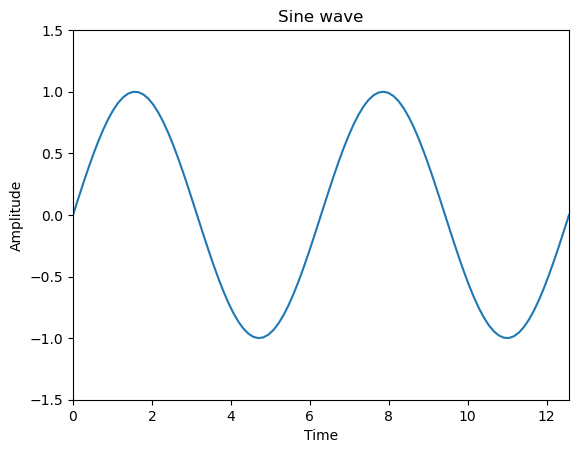

In [32]:
# numpyMatplot.py
import numpy as np
import matplotlib.pyplot as plt
# np.linspace: devide line from 0 to 4*pi into 100 equidistant points
x = np.linspace(0, 4*np.pi, 100)
sinx = np.sin(x) # find sin(x) for above 100 points
plt.plot(x,sinx) # plot (x, sin(x))
plt.xlabel("Time") # label for x axis
plt.ylabel("Amplitude") # label for y axis
plt.title('Sine wave') # title
plt.xlim([0, 4*np.pi]) # x-axis display range
plt.ylim([-1.5, 1.5]) # y-axis display range
plt.show() # to show the plot on the screen
